# Project Building a CNN to Classify Handwritten Characters

Ana Januário

A company that provides online ancestry search services has contracted with you to develop tools that they can use to convert historical documents scanned as images into content stored in searchable databases. Many of the original documents are handwritten, making the task more challenging.
As a proof-of-concept for how a CNN might be used to process scanned images, you will create a model to identify scanned characters in the MNIST database, which contains 60,000 scanned characters in the training set and 10,000 scanned characters in the test set.

## Import software libraries and load the dataset #

In [1]:
# Import required libraries.
import sys                             # Read system parameters.
import shutil
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}\n'.format(keras.__version__))

# Load the dataset.

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} test records.'.format(len(X_test.data)))

# comment the following two lines to make outcomes non-deterministic. 
seed(1)
tensorflow.random.set_seed(1)


Libraries used in this project:
- Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.24.3
- Matplotlib 3.7.2
- scikit-learn 1.3.0
- TensorFlow 2.15.0
- Keras 2.15.0

Loaded 60000 training records.
Loaded 10000 test records.


# Get acquainted with the dataset

In [2]:
# Dimensions of the training and testing sets and their labels

print('Training set dimensions:')
print('Features shape:', X_train.shape)
print('Labels shape:', y_train.shape)
print('Testing set dimensions:')
print('Features shape:', X_test.shape)
print('Labels shape:', y_test.shape)

Training set dimensions:
Features shape: (60000, 28, 28)
Labels shape: (60000,)
Testing set dimensions:
Features shape: (10000, 28, 28)
Labels shape: (10000,)


In [3]:
print('Shape of feature space: {}\n'.format(X_train[0].shape))

print('Some Examples:\n')
print(X_train[7:10])

Shape of feature space: (28, 28)

Some Examples:

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# Visualize the data examples

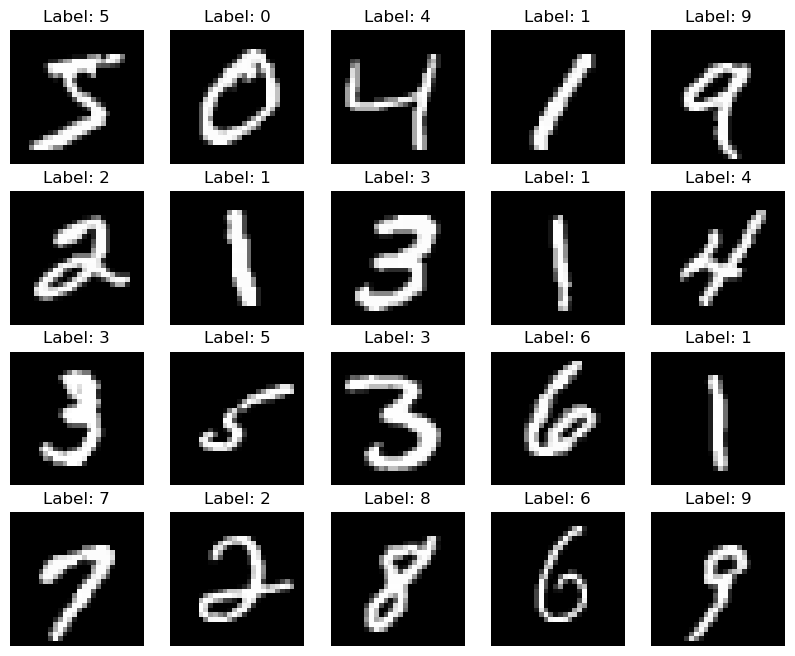

In [4]:
# Show a preview of the first 20 images
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label: {}'.format(y_train[i]))
    plt.axis('off')
plt.show()

# Prepare the data for training with Keras

In [5]:
# Reshape arrays to add greyscale flag.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

from keras.utils import to_categorical

# One-hot encode the data for each label.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('One-hot encoding for first image: {}'.format(y_train[0]))

One-hot encoding for first image: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Split the datasets

In [6]:
# Split the training and validation datasets and their labels.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 50)

print(f'Training features:         {X_train.shape}')
print(f'Validation features:       {X_val.shape}')
print(f'Training labels:           {y_train.shape}')
print(f'Validation labels:         {y_val.shape}')

Training features:         (45000, 28, 28, 1)
Validation features:       (15000, 28, 28, 1)
Training labels:           (45000, 10)
Validation labels:         (15000, 10)


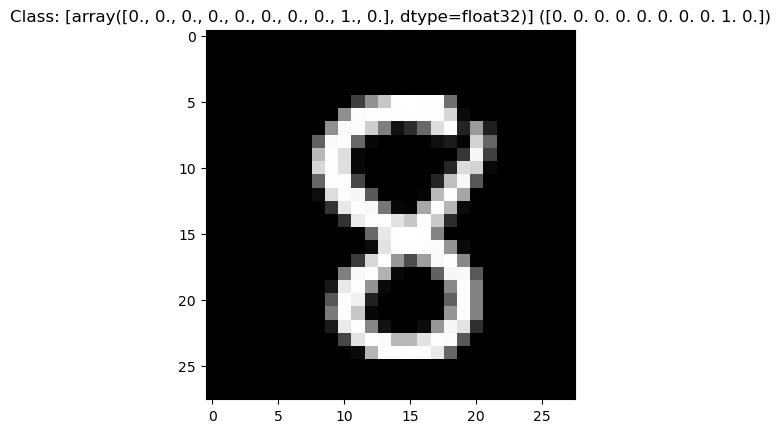

In [7]:
#Plot of our first example
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class: {} ({})'.format([y_train[0]], y_train[0]));

# Build the CNN structure

The layers I will use for this model include:
- Conv2D, 64 nodes, kernel size of 3, with ReLU activation, and an input shape of (28, 28, 1)
- Conv2D, 32 nodes, kernel size of 3, with ReLU activation
- Flatten (to connect the convolution and dense layers)
- Dense, 10 nodes, with softmax activation

In [8]:
# Import the required libraries.
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, LeakyReLU


# Create the model.
model = Sequential()

# Add model layers as specified.

# Add Conv2D layer with 64 nodes, kernel size of 3, ReLU activation, and input shape of (28, 28, 1)
model.add(Conv2D(64, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same'))  

# Add Conv2D layer with 32 nodes, kernel size of 3, ReLU activation
model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same')) 

# Add Flatten layer to connect the convolution and dense layers
model.add(Flatten())

# Add Dense layer with 10 nodes and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model and summarize the layers

In [9]:
# Compile the model.
#   - We use the adam optimizer.
#   - We use categorical_crossentropy for the loss function.
#   - We use accuracy to measure model performance.


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the layers.
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                  

# Plot a graph of the model

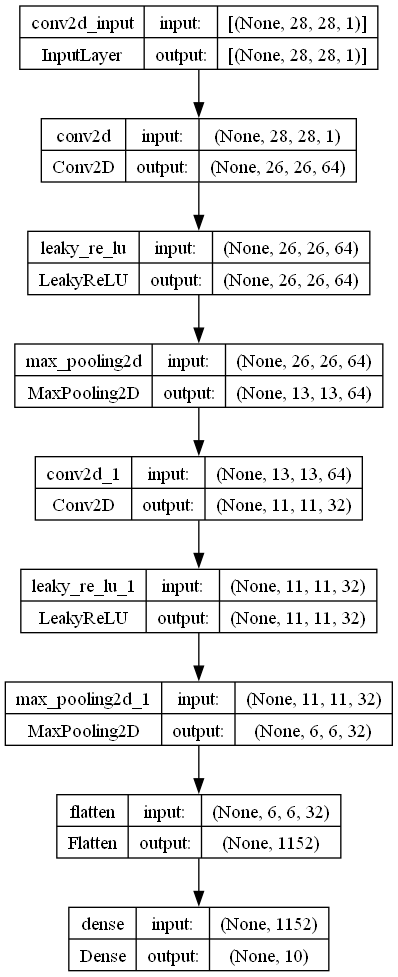

In [10]:
# Plot a graph of the model.
from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'project4.png')

# Train the model

In [11]:
# Train the model over 1 epoch.
model_trained = model.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs=1)



1407/1407 [==============================] - 15s 10ms/step - loss: 0.3614 - accuracy: 0.9298 - val_loss: 0.1200 - val_accuracy: 0.9641


# Evaluate the model on the test data

In [12]:
# Evaluate the model on the test data, showing loss and accuracy.
eval_test = model.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.1
Accuracy: 97%


# Make predictions on the test data

In [13]:
# Make predictions on the test data.
prediction = model.predict(X_test)
prediction = np.argmax(np.round(prediction), axis = 1)  # Extract class number from one-hot-encoded array.
actual = np.argmax(np.round(y_test), axis = 1)

# Show the first 30 examples.
print('Actual class:    {}'.format(actual[:30]))
print('Predicted class: {}'.format(prediction[:30]))

313/313 [==============================] - 1s 4ms/step
Actual class:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Predicted class: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1]


# Visualize the predictions for 30 examples

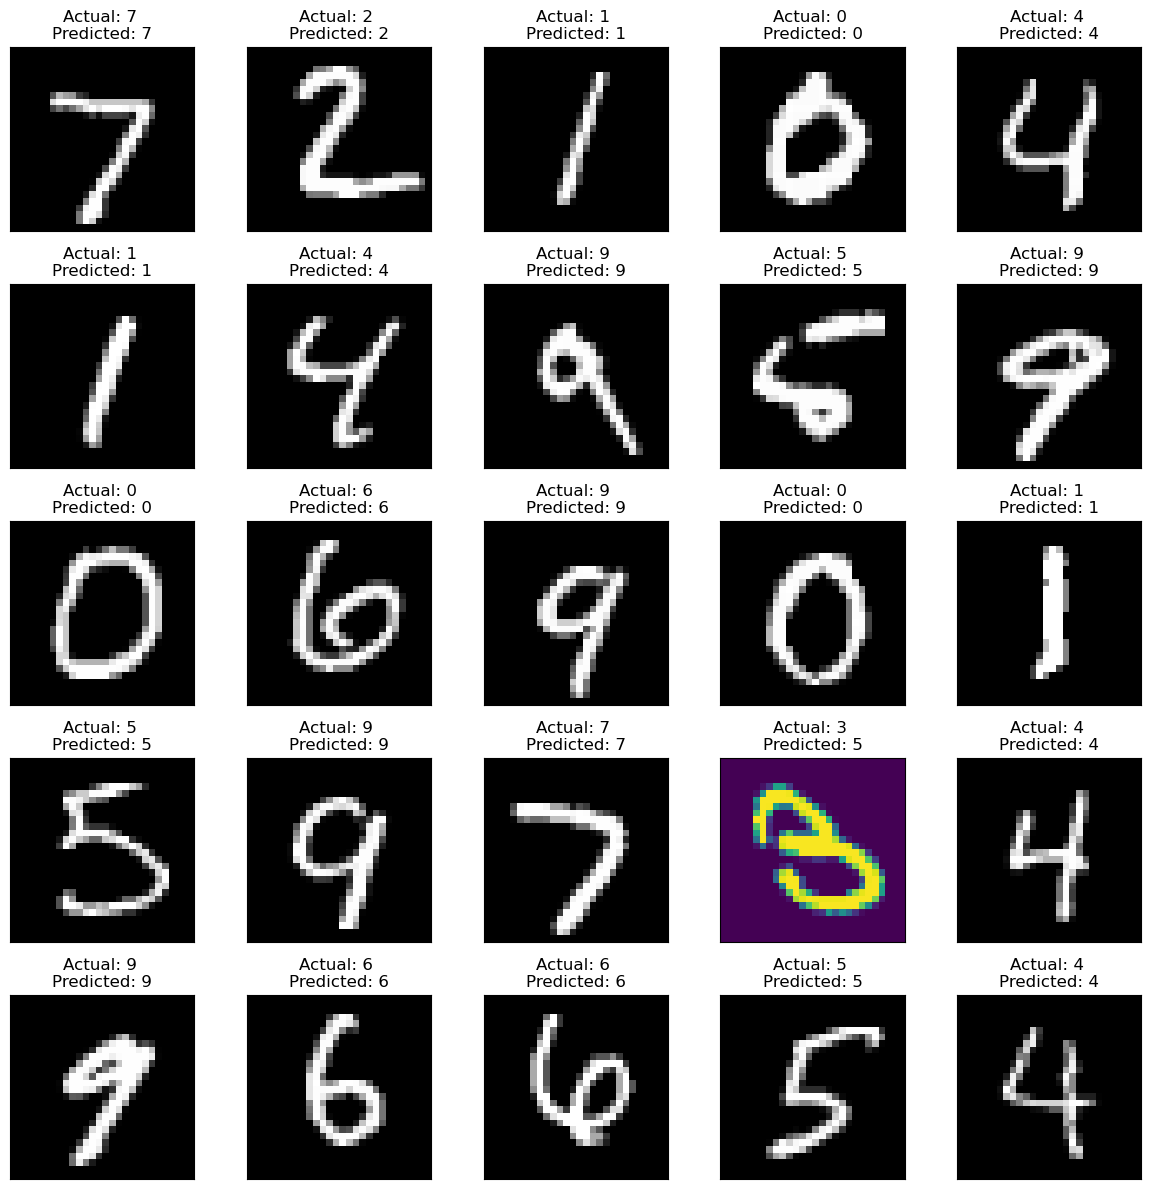

In [14]:
# Using the test set, show the first 30 predictions, highlighting any incorrect predictions in color.
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (12, 12))

for i, ax in zip(range(25), axes.flatten()):
    
    if actual[i] == prediction[i]:
        ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    else:
        ax.imshow(X_test[i].reshape(28, 28))  # Highlight wrong predictions.
        
    ax.title.set_text('Actual: {} \nPredicted: {}'.format(actual[i], prediction[i]))

# Turn off axis ticks for readability.
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()

We only got 1 error, the model has good accuracy and can be usefull to scanning documents handwritten.